In [1]:
# Default Imports
working_dir = r'C:\Users\Solomon Gold\Desktop\Udacity\deep-reinforcement-learning-master\p2_continuous-control'
env_path = r'C:\Users\Solomon Gold\Desktop\Udacity\deep-reinforcement-learning-master\p2_continuous-control\Reacher_Windows_x86_64\Reacher_Windows_x86_64\Reacher.exe'

import os
os.chdir(working_dir)

import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import torch

# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
env = UnityEnvironment(file_name=env_path)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
for _ in range(100):
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


### 4. DDGP Agent

I chose to solve the environment with a Deep Deterministic Policy Gradient (DDPG) agent because it is amenable for use with continuous action spaces. Additionally, there is a well developed code base available for the DDPG agent from Udacity to build on and refine.

#### Network Architecture
Both actor and critic networks consist of two hidden layers of 128 features each. Batch normalization is applied directly to the input and also to the features directly before entry to layer two. I did experiment with adding a third layer of batch norm before the second level features enter the output layer, but this degraded performance so severely that the model could not learn at all. It is an open question as to why this is the case.

Hyper parameters:
- BUFFER_SIZE = int(1e6)  
- BATCH_SIZE = 512       
- GAMMA = 0.99            
- TAU = 1e-3             
- LR_ACTOR = 2e-4       
- LR_CRITIC = 2e-4        
- WEIGHT_DECAY = 0        

#### Improvements
As suggested by a few members of the community on the Slack channel, synchronizing the initialized weights between the target and the local network significantly sped up the learning process.

#### Results
The agent was able to solve the environment in under 200 episodes.

In [7]:
def ddpg(n_episodes=1000, max_t=1000):
    scores = []
    scores_deque = deque(maxlen=100)
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]    # reset env
        agent.reset()                                        # reset agent   
        
        state = env_info.vector_observations                 # get state
        score = 0                                            # init score
        for t in range(max_t):
            #print('Episode:',i_episode,', t:',t)
            #print('State:',state)
            
            action = agent.act(state)                        # generate action with agent-policy
            #print('Action:',action)
            
            env_info = env.step(action)[brain_name]          # play policy action
            next_state = env_info.vector_observations        # observe new state
            reward = env_info.rewards[0]                     # observe reward
            done = env_info.local_done[0]                    # check if episode is done
            #print('Reward:',rewards,', Done: ', dones)
            #print('Next State:',next_state)
            
            agent.step(state, action, reward, next_state, done) # train agent with observed (S,A,R,S')-tuple 
            
            state = next_state
            score += reward
            if done:
                break 
                
        scores_deque.append(score)
        scores.append(score)
        avg_score = np.mean(scores_deque)
        print('\rEpisode {}\tScore: {:.2f}\tMov.Average Score: {:.2f}'.format(i_episode, score, avg_score), end="\n")

        if avg_score>=30:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')     
            break
            
    return scores

Episode 1	Score: 1.44	Mov.Average Score: 1.44
Episode 2	Score: 0.44	Mov.Average Score: 0.94
Episode 3	Score: 0.29	Mov.Average Score: 0.72
Episode 4	Score: 0.93	Mov.Average Score: 0.77
Episode 5	Score: 0.60	Mov.Average Score: 0.74
Episode 6	Score: 1.23	Mov.Average Score: 0.82
Episode 7	Score: 1.14	Mov.Average Score: 0.87
Episode 8	Score: 1.49	Mov.Average Score: 0.94
Episode 9	Score: 0.35	Mov.Average Score: 0.88
Episode 10	Score: 0.76	Mov.Average Score: 0.87
Episode 11	Score: 0.55	Mov.Average Score: 0.84
Episode 12	Score: 1.29	Mov.Average Score: 0.88
Episode 13	Score: 1.05	Mov.Average Score: 0.89
Episode 14	Score: 1.39	Mov.Average Score: 0.92
Episode 15	Score: 1.23	Mov.Average Score: 0.95
Episode 16	Score: 1.15	Mov.Average Score: 0.96
Episode 17	Score: 2.01	Mov.Average Score: 1.02
Episode 18	Score: 0.71	Mov.Average Score: 1.00
Episode 19	Score: 1.68	Mov.Average Score: 1.04
Episode 20	Score: 1.57	Mov.Average Score: 1.06
Episode 21	Score: 2.20	Mov.Average Score: 1.12
Episode 22	Score: 1.82

Episode 172	Score: 39.27	Mov.Average Score: 26.03
Episode 173	Score: 29.32	Mov.Average Score: 26.28
Episode 174	Score: 37.98	Mov.Average Score: 26.56
Episode 175	Score: 33.51	Mov.Average Score: 26.84
Episode 176	Score: 38.91	Mov.Average Score: 27.19
Episode 177	Score: 38.94	Mov.Average Score: 27.50
Episode 178	Score: 31.35	Mov.Average Score: 27.77
Episode 179	Score: 29.57	Mov.Average Score: 27.97
Episode 180	Score: 32.90	Mov.Average Score: 28.24
Episode 181	Score: 33.99	Mov.Average Score: 28.48
Episode 182	Score: 38.80	Mov.Average Score: 28.78
Episode 183	Score: 38.26	Mov.Average Score: 29.00
Episode 184	Score: 36.32	Mov.Average Score: 29.25
Episode 185	Score: 38.42	Mov.Average Score: 29.41
Episode 186	Score: 37.79	Mov.Average Score: 29.65
Episode 187	Score: 36.30	Mov.Average Score: 29.90
Episode 188	Score: 37.32	Mov.Average Score: 30.21


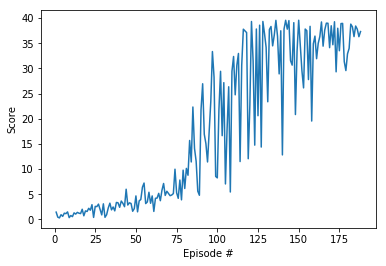

In [8]:
from ddpg_agent import Agent

agent = Agent(state_size=33, action_size=4)
scores = ddpg(n_episodes=1000)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [9]:
env.close()

### 5. Future Work
- I would like to understand why the final batch norm layer that I attempted to apply directly before the output layer degraded training. 
- It would also be interesting to solve the enviromnet using a probabilistic policy such as PPO. 
- Gradient clipping is often considered important, and it would be worth exploring the magnitude of the gradients in this problem and to apply clipping.
- Enhance the understanding of the training process by visualizing the parameter evolution via TensorBoard.